In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import basicDeltaOperations as op
import seaborn as sns
import json

In [2]:
with open('120k_Data.json') as f:
    neg120k = json.load(f)

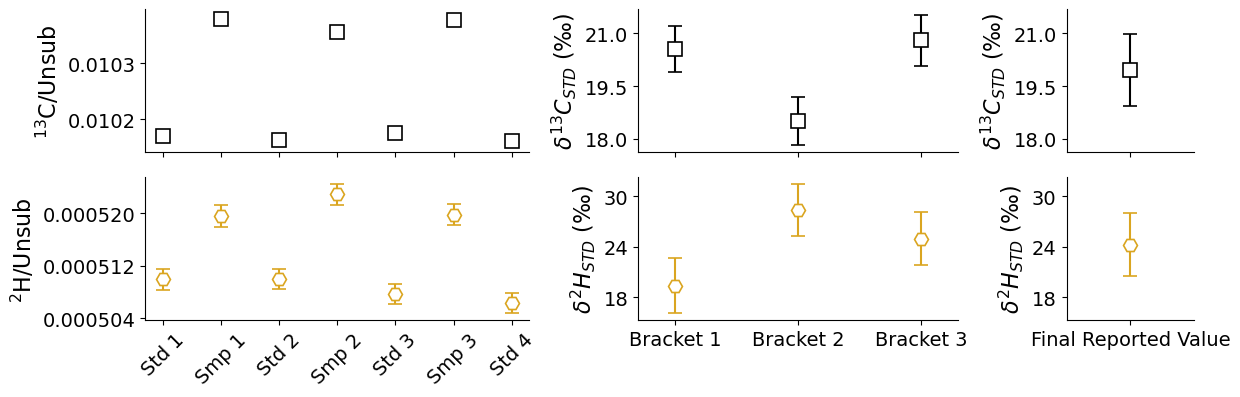

In [8]:
thisSmp = 'A'
thisData = neg120k[thisSmp]

font = {'size'   : 14}

matplotlib.rc('font', **font)

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18*0.7,6*0.7), 
                         gridspec_kw={'width_ratios': [3, 2.5, 1]}, sharex = 'col')

plotParams = {'13C/Unsub':{'mec':'k','marker':'s','msize':10,'mfc':'w','mew':1.2,'label': u"$^{13}$C/Unsub", 'deltalabel': '$\delta^{13}C_{STD}$'},
              '17O/Unsub':{'mec':'red','marker':'s','msize':10,'mfc':'w','mew':1.2},
              '18O/Unsub':{'mec':'darkred','marker':'s','msize':10,'mfc':'w','mew':1.2},
              'D/Unsub':{'mec':'goldenrod','marker':'H','msize':10,'mfc':'w','mew':1.2, 'label': u"$^{2}$H/Unsub",'deltalabel':'$\delta^{2}H_{STD}$'}}

for ratioIdx, (ratioKey, ratioData) in enumerate(thisData.items()):
    thisPlotParam = plotParams[ratioKey]
    cAx = axes[ratioIdx, 0]

    cAx.errorbar(range(7),np.array(ratioData['Raw Ratios']), np.array(ratioData['Raw Ratios'])* np.array(ratioData['Raw RSE']), 
                fmt = thisPlotParam['marker'], markersize = thisPlotParam['msize'], mfc = thisPlotParam['mfc'], 
                mec = thisPlotParam['mec'], ecolor = thisPlotParam['mec'], mew  = thisPlotParam['mew'], capsize =5 )

    xticks = list(range(7))
    xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels, rotation = 45)
    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

    cAx.set_ylabel(thisPlotParam['label'], fontsize = 16)

    cAx = axes[ratioIdx,1]

    cAx.errorbar(range(3),ratioData['Deltas'], ratioData['DeltasErr'], 
                 fmt = thisPlotParam['marker'], markersize = thisPlotParam['msize'], mfc = thisPlotParam['mfc'], 
                mec = thisPlotParam['mec'], ecolor = thisPlotParam['mec'], mew  = thisPlotParam['mew'], capsize = 5)

    xticks = list(range(3))
    xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

    cAx.set_xlim(-0.3,2.3)
    #cAx.set_ylim(0,8)

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    cAx.set_ylabel(thisPlotParam['deltalabel'] + ' (‰)', fontsize = 16)


    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
    ylim = cAx.get_ylim()

    cAx = axes[ratioIdx,2]

    cAx.errorbar(range(1),ratioData['Delta Mean'], ratioData['ER'], 
                fmt = thisPlotParam['marker'], markersize = thisPlotParam['msize'], mfc = thisPlotParam['mfc'], 
                mec = thisPlotParam['mec'], ecolor = thisPlotParam['mec'], mew  = thisPlotParam['mew'], capsize = 5)

    xticks = list(range(1))
    xtickLabels = ['Final Reported Value']

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    cAx.set_ylabel(thisPlotParam['deltalabel'] + ' (‰)', fontsize = 16)

    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
    cAx.set_ylim(ylim[0],ylim[1])

    #cAx.legend()

sns.despine()

plt.tight_layout()

#fig.savefig('Representative Measurements Methionine.png', dpi = 1000)